In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import font_manager as fm
import matplotlib as mpl
% matplotlib inline

In [2]:
# old cases from previous group
old_cases = pd.read_csv('cases.csv')
old_cases.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5,15,23,43,44,51,53,55,63,67,71,73,74,79,92,107,108,126,127,130,132,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case Id,Case Name,Case Type,Case Status,Entry Date,Argued Date,Status Date,Decision Date,Has Affirm,Has Reverse,...,e3pp,Pro Se Third-party Defendant Extension Days,Lower Ct Judge,SJ Number,Pro Se Other Appellant Extensions,Nominal Party,Defendant Extension Days,Student appearing under SJC Rule 3:03,Out-of-state attorney,Defendant
0,2008-P-0001,PETER G. HILL vs. JAMES LUKOWIAK,Civil,Closed: Rescript issued,01/02/2008,NaN,01/20/2009,12/22/2008,Yes,NaN,...,NaN,NaN,"Bruce R. Henry, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-P-1002,CASELLA WASTE MANAGEMENT OF MA vs. JOHN TAMBURO,Civil,Closed: Rescript issued,06/13/2008,NaN,08/04/2010,05/04/2010,Yes,NaN,...,NaN,NaN,"David A. McLaughlin, J.",NaN,NaN,NaN,133.0,NaN,NaN,John Tamburo
2,2008-P-1006,FARMER & FLIER ASSOCIATES vs. GUILFORD TRANSPO...,Civil,Closed: Rescript issued,06/13/2008,NaN,11/04/2009,07/15/2009,Yes,NaN,...,NaN,NaN,"Herman J. Smith, Jr., J.",NaN,NaN,NaN,NaN,NaN,NaN,Guilford Transportation Indus.
3,2008-P-1007,B.M. vs. J.C.,Civil,Closed: Rescript issued,06/16/2008,NaN,06/24/2009,05/27/2009,Yes,NaN,...,NaN,NaN,"Judith Nelson Dilday, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-P-1014,SOLANGE DASILVA vs. MICHAEL BERMAN,Civil,Closed: Rescript issued,06/18/2008,NaN,06/16/2009,05/19/2009,Yes,NaN,...,NaN,NaN,"Thayer Fremont-Smith, J.",NaN,NaN,NaN,NaN,NaN,NaN,Michael Berman


In [15]:
# Data cleaning, show cases are appealed or not

old_cases_app = old_cases[old_cases['Court Type'] == 'APPEALS COURT']
old_cases_sjc = old_cases[old_cases['Court Type'] == 'SUPREME JUDICIAL COURT']
old_cases_sjc = old_cases_sjc[['Case Name', 'Case Type', 'Has Affirm', 'Has Reverse', 'Court Type']]
old_cases_sjc.head()

old_cases_sjc["Has Affirm"]= old_cases_sjc["Has Affirm"].astype(str)
old_cases_sjc["Has Reverse"]= old_cases_sjc["Has Reverse"].astype(str)

def define_reverse(df):
    appealed = []
    for i, row in df.iterrows():
        if (row['Has Affirm']  ==   'Yes' ) & (row['Has Reverse'] ==   'nan' ):
            appealed.append('No')
        elif (row['Has Affirm']  ==   'nan' ) & (row['Has Reverse']  ==   'Yes' ):
            appealed.append('Yes')
        else:
            appealed.append('Partially')
    return appealed

old_cases_sjc['appealed'] = define_reverse(old_cases_sjc)
old_cases_sjc = old_cases_sjc.drop(['Has Reverse', 'Has Affirm', 'Court Type'], axis = 1)
old_cases_sjc.head()

,Case Name,Case Type,appealed
6436,IN THE MATTER OF PETER PAUL MITRANO,Civil,No
6437,RUDOLPH F. PIERCE vs. CARNEICE G. PIERCE,Civil,No
6438,ROBERT L. FRONK & others vs. JOHN P. FOWLER & ...,Civil,Yes
6439,JOHN MOOT vs. DEPARTMENT OF ENVIRONMENTAL PROT...,Civil,No
6440,SCOTT WADSWORTH'S CASE,Civil,Partially


In [4]:
new_cases_sjc = pd.read_csv('new_sjc_data.csv')

In [5]:
# Preprocessing for concating old cases dataframe and new cases dataframe
new_cases_sjc = new_cases_sjc.loc[:, ~new_cases_sjc.columns.str.contains('^Unnamed')]
new_cases_sjc = new_cases_sjc.rename(columns={'cases': 'Case Name', 'type' : 'Case Type' })
new_cases_sjc = new_cases_sjc.drop(['headnote','text','caseid', 'judge'], axis = 1)

In [6]:
new_cases_sjc['Case Type'] = new_cases_sjc['Case Type'].str.capitalize()
new_cases_sjc.head()

,Case Name,Case Type,appealed
0,in the matter of e.c.,Criminal,Yes
1,commonwealth vs. joseph wright.,Criminal,No
2,"brian rafferty vs. merck & co., inc., & anot...",Civil,No
3,commonwealth vs. johnelle m. brown.,Criminal,No
4,commonwealth vs. g.f.,Civil,Partially


In [7]:
# combine 2 dataframes together for analyzing
all_cases_sjc = pd.concat([old_cases_sjc,new_cases_sjc],axis= 0)
all_cases_sjc

,Case Name,Case Type,appealed
6436,IN THE MATTER OF PETER PAUL MITRANO,Civil,No
6437,RUDOLPH F. PIERCE vs. CARNEICE G. PIERCE,Civil,No
6438,ROBERT L. FRONK & others vs. JOHN P. FOWLER & ...,Civil,Yes
6439,JOHN MOOT vs. DEPARTMENT OF ENVIRONMENTAL PROT...,Civil,No
6440,SCOTT WADSWORTH'S CASE,Civil,Partially
6441,KERRI L. SMITH vs. STEVEN MASTALERZ,Civil,Partially
6442,"ALBERT WHITE & others vs. ANNE M. HARTIGAN, Se...",Civil,No
6443,RONALD GULLICK vs. COMMONWEALTH,Civil,No
6444,JOHN A. FEENEY & another vs. DELL INC. & others,Civil,Yes
6445,IN THE MATTER OF THOMAS F. PATCH,Civil,Partially


In [8]:
# Count cases that are affirmed, reversed, and partially reversed

total_count = all_cases_sjc.appealed.count()

reverse_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'Yes')].appealed.count()
affirm_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'No')].appealed.count()
partially_reverse_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'Partially')].appealed.count()
print('reverse_count = ', reverse_count, '    affirm_count = ' , affirm_count, '    partially_reverse_count = ' , partially_reverse_count )

reverse_count =  124     affirm_count =  405     partially_reverse_count =  176


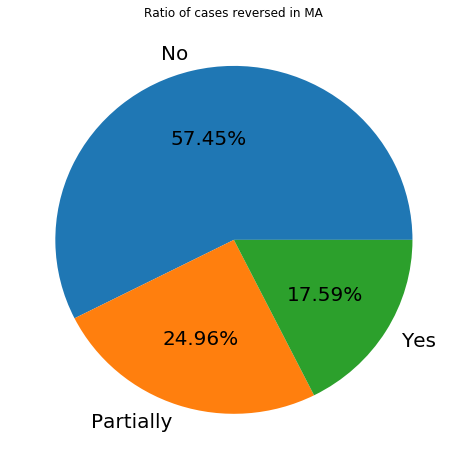

In [10]:
# Visulize as pie chart

all_cases_sjc_pie_chart = all_cases_sjc.groupby('appealed').size()
all_cases_sjc_pie_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Ratio of cases reversed in MA")
plt.ylabel("")
plt.show()

In [24]:
# Read from appeal court (new cases)
# # Count cases that are from appeal court, SJC, and the total number

new_case_app = pd.read_csv('new_case_data.csv')

appeal_cases_count =  new_case_app.cases.count() + old_cases_app.URL.count()
sjc_cases_count =  all_cases_sjc.appealed.count()
all_cases_count = sjc_cases_count + appeal_cases_count

print ('appeal_cases_count = ', appeal_cases_count,  '    sjc_cases_count = ',sjc_cases_count,  '   all_cases_count = ',   all_cases_count)

appeal_cases_count =  6728     sjc_cases_count =  705    all_cases_count =  7433


Text(0.5,1,'Count and ratio of cases from appeal court or SJC')

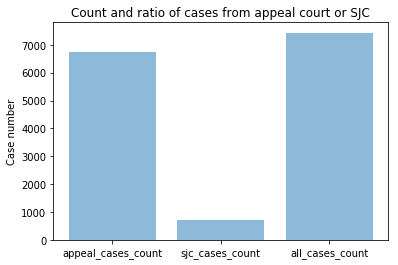

In [25]:
# Visualize as bar plot

objects = ('appeal_cases_count', 'sjc_cases_count', 'all_cases_count')
y_pos = np.arange(len(objects))
performance = [appeal_cases_count ,sjc_cases_count ,all_cases_count]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Case number')
plt.title('Count and ratio of cases from appeal court or SJC')

In [13]:
# prepare for distribution among civil vs criminal cases from SJC in MA
all_cases_sjc_CaseType = all_cases_sjc[['Case Type']][all_cases_sjc['appealed'] == "No"]

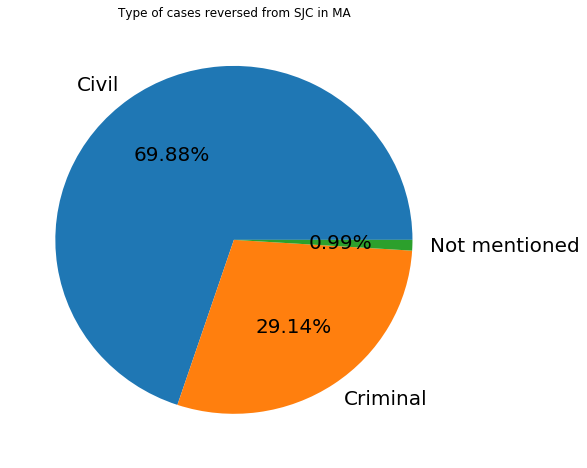

In [14]:
# Visualize as pie chart

all_cases_sjc_CaseType_pie_chart = all_cases_sjc_CaseType.groupby('Case Type').size()
all_cases_sjc_CaseType_pie_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Type of cases reversed from SJC in MA")
plt.ylabel("")
plt.show()